In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import confusion_matrix, balanced_accuracy_score, make_scorer
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

In [22]:
data = pd.read_csv('./datasets/final.csv')

In [23]:
X = data['comments']
y = data['label']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 42)

In [25]:
pipe = Pipeline([
    
    #('tfidf',TfidfVectorizer()),
   ('cvec', CountVectorizer()),
    ('rfc', RandomForestClassifier()),
   
])

In [28]:
grid_param = {
    'cvec__ngram_range' : [(1,1)],
    'cvec__max_features': [1000],
    'cvec__min_df'      : [2, 3],
    'cvec__max_df'      : [.95,.05],
    'cvec__stop_words'  : [stop_words],
    'rfc__max_features':['auto',2,5],
    'rfc__n_estimators': [150],
    'rfc__max_depth': [10,12]
}

grid = GridSearchCV(pipe,
                    grid_param,
                    n_jobs = -1, # -1 means using all processors
                    verbose = 2)

In [29]:
grid.fit(X_train,y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   19.7s
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:   48.4s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('cvec', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip...obs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'cvec__ngram_range': [(1, 1)], 'cvec__max_features': [1000], 'cvec__min_df': [2, 3], 'cvec__max_df': [0.95, 0.05], 'cvec__stop_words': [{'up', 'his', 'did', 'under', 'over', 'couldn', 's', 'herself', 'she', 'himself', 'too', "wasn't", "weren't", 'off', 'me', 'below', 'having', 'didn', 'f...now'}], 'rfc__max_features': ['auto', 2, 5], 'rfc__n_estimators': [150], 'rfc__max_depth': [10, 12]},
       pre_dispatch='2*n_jobs', re

In [8]:
grid.score(X_train,y_train) #.976, .788, .800, .813

0.8315508021390374

In [9]:
grid.score(X_test,y_test) #.739,.7114, .7334, .723

0.7394789579158316

In [10]:
grid.best_params_

{'cvec__max_df': 0.95,
 'cvec__max_features': 1000,
 'cvec__min_df': 3,
 'cvec__ngram_range': (1, 1),
 'cvec__stop_words': {'a',
  'about',
  'above',
  'after',
  'again',
  'against',
  'ain',
  'all',
  'am',
  'an',
  'and',
  'any',
  'are',
  'aren',
  "aren't",
  'as',
  'at',
  'be',
  'because',
  'been',
  'before',
  'being',
  'below',
  'between',
  'both',
  'but',
  'by',
  'can',
  'couldn',
  "couldn't",
  'd',
  'did',
  'didn',
  "didn't",
  'do',
  'does',
  'doesn',
  "doesn't",
  'doing',
  'don',
  "don't",
  'down',
  'during',
  'each',
  'few',
  'for',
  'from',
  'further',
  'had',
  'hadn',
  "hadn't",
  'has',
  'hasn',
  "hasn't",
  'have',
  'haven',
  "haven't",
  'having',
  'he',
  'her',
  'here',
  'hers',
  'herself',
  'him',
  'himself',
  'his',
  'how',
  'i',
  'if',
  'in',
  'into',
  'is',
  'isn',
  "isn't",
  'it',
  "it's",
  'its',
  'itself',
  'just',
  'll',
  'm',
  'ma',
  'me',
  'mightn',
  "mightn't",
  'more',
  'most',
  'mus

In [11]:
preds = grid.predict(X_test)

In [12]:
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()

In [13]:
def total_metrics(insta_model,X_test, y_test):
    preds = insta_model.predict(X_test)
    tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn+fp)
    precision =  tp / (tp + fp)
    bas = balanced_accuracy_score(y_test,preds)
    
    print("\u0332".join("RESULTS OF COUNT-VECTORIZER / RANDOM FORREST MODEL "))
    print('')
    print(f"          Accuracy: {round(insta_model.best_score_,3)}")
    print('')
    print(f"  Balance Accuracy: {round(bas,3)}")
    print('')
    print(f"       Sensitivity: {round(sensitivity,3)}")
    print('')
    print(f"       Specificity: {round(specificity,3)}")
    print('')
    print(f"         Precision: {round(precision,3)}")
    print('')    
    

In [14]:
total_metrics(grid,X_test,y_test)

R̲E̲S̲U̲L̲T̲S̲ ̲O̲F̲ ̲C̲O̲U̲N̲T̲-̲V̲E̲C̲T̲O̲R̲I̲Z̲E̲R̲ ̲/̲ ̲R̲A̲N̲D̲O̲M̲ ̲F̲O̲R̲R̲E̲S̲T̲ ̲M̲O̲D̲E̲L̲ 

          Accuracy: 0.729

  Balance Accuracy: 0.739

       Sensitivity: 0.896

       Specificity: 0.581

         Precision: 0.684



In [15]:
# Let's create a dataframe called pred_df that contains:
# 1. The list of true values of our test set.
# 2. The list of predicted probabilities based on our model.

pred_proba = [i[1] for i in grid.predict_proba(X_test)]

pred_df = pd.DataFrame({'true_values': y_test,
                        'pred_probs':pred_proba})

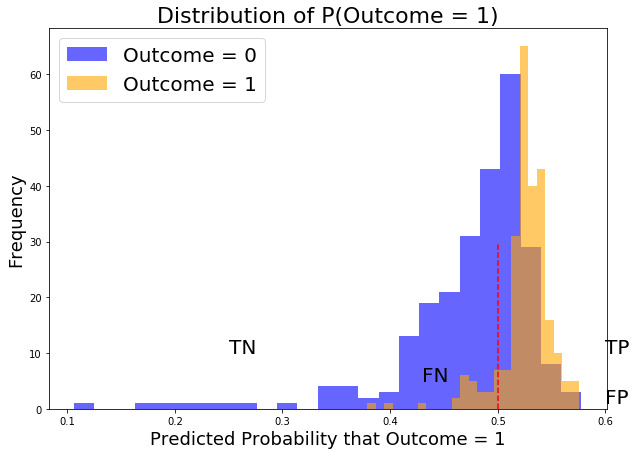

In [16]:
# Create figure.
plt.figure(figsize = (10,7))

# Create two histograms of observations.
plt.hist(pred_df[pred_df['true_values'] == 0]['pred_probs'],
         bins = 25,
         color = 'b',
         alpha = 0.6,
         label = 'Outcome = 0')
plt.hist(pred_df[pred_df['true_values'] == 1]['pred_probs'],
         bins = 25,
         color = 'orange',
         alpha = 0.6,
         label = 'Outcome = 1')

# Add vertical line at P(Outcome = 1) = 0.5.
plt.vlines(x = 0.5,
           ymin = 0,
           ymax = 30,
           color = 'r',
           linestyle = '--')

# Add annotations for TN, FN, TP, FP.
plt.annotate(xy = (0.25, 10),
             s = 'TN',
             size = 20)

plt.annotate(xy = (0.43, 5),
             s = 'FN',
             size = 20)

plt.annotate(xy = (0.60, 10),
             s = 'TP',
             size = 20)

plt.annotate(xy = (0.6, 1),
             s = 'FP',
             size = 20)

# Label axes.
plt.title('Distribution of P(Outcome = 1)', fontsize = 22)
plt.ylabel('Frequency', fontsize = 18)
plt.xlabel('Predicted Probability that Outcome = 1', fontsize = 18)

# Create legend.
plt.legend(fontsize = 20);